In [1]:
import numpy as np
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 获取当前目录
current_dir = os.getcwd()  

# 添加 `interClusLib` 的上级目录到 Python 路径
sys.path.append(os.path.join(current_dir, ".."))

import interClusLib
from interClusLib.IntervalData import IntervalData
from interClusLib.visualization.Dendrogram import Dendrogram
from interClusLib.visualization.IntervalParallelCoordinates import IntervalParallelCoordinates
from interClusLib.evaluation.SilhouetteScore import *
from interClusLib.evaluation.DunnIndex import *
from interClusLib.clustering.IntervalAgglomerativeClustering import IntervalAgglomerativeClustering
from interClusLib.clustering.IntervalSOM import IntervalSOM
from interClusLib.clustering.IntervalFuzzyCMeans import IntervalFuzzyCMeans
from interClusLib.metric import *


print("interClusLib Path:", interClusLib.__file__)

random_data = IntervalData.random_data(30, 3)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()

interClusLib Path: /Users/jiashuchen/Desktop/InterClusLib/examples/../interClusLib/__init__.py

 Random Interval Data:
    feature_1_lower  feature_1_upper  feature_2_lower  feature_2_upper  \
0         31.042729        73.732932        21.101904        54.681817   
1          6.672728        13.372307        62.413378        89.628758   
2          1.678013        46.316803        24.147205        67.296981   
3          7.684017        51.585796         0.048273        97.038728   
4         13.985987        25.766099         5.189244        96.157146   
5         72.092376        82.662710        42.406262        63.114926   
6         62.738376        65.006745        31.588723        33.394110   
7         32.680578        59.570001         5.566243        77.197009   
8         57.662491        92.019864        11.602139        73.103861   
9          5.878005        51.965782         9.717795        13.035114   
10        16.831171        40.088339        77.108367        86.136

In [2]:
model = IntervalAgglomerativeClustering(n_clusters=4, linkage='complete')

model.fit(random_data.get_intervals())

print(model.get_labels())

print(silhouette_score(random_data.get_intervals(),model.get_labels(),metric='euclidean'))

[1 3 3 3 3 1 1 1 1 0 3 1 0 1 3 1 3 2 2 2 3 1 1 3 1 3 1 2 1 3]
0.20497138760437342


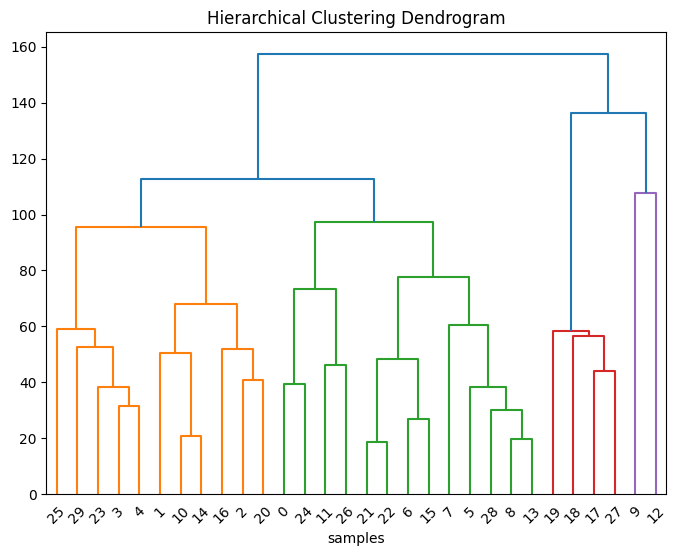

<Figure size 1000x600 with 0 Axes>

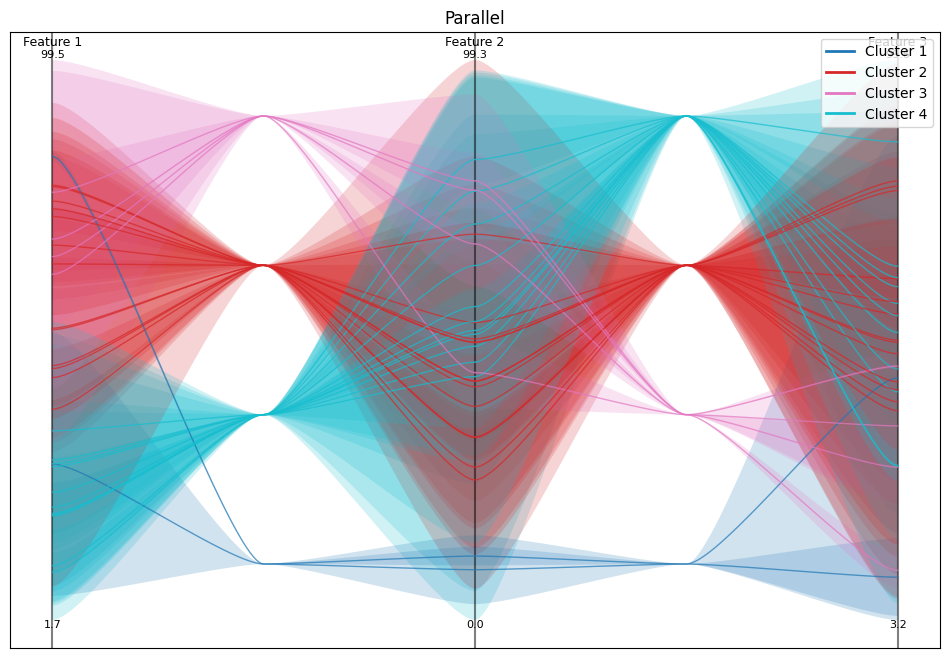

In [3]:
plt.figure(figsize=(8, 6))
Dendrogram.plot_dendrogram(model.model_)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plt.xlabel("samples")
plt.show()

plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.get_labels(), beta = 1)
plt.title("Parallel")
plt.show()

In [4]:
model = IntervalFuzzyCMeans(n_clusters=4, max_iter=200,adaptive_weights=True)

model.fit(random_data.get_intervals())

model.get_membership()

array([[0.14021942, 0.16990183, 0.46630414, 0.22357461],
       [0.52121186, 0.26304651, 0.12846933, 0.0872723 ],
       [0.2789265 , 0.46529789, 0.15972177, 0.09605384],
       [0.17556118, 0.65395247, 0.10445876, 0.06602759],
       [0.2853109 , 0.53823518, 0.10652968, 0.06992424],
       [0.10308196, 0.08781927, 0.2234172 , 0.58568158],
       [0.11194988, 0.11033322, 0.52279124, 0.25492566],
       [0.19979138, 0.34580326, 0.23634216, 0.21806321],
       [0.06656804, 0.10395229, 0.16096264, 0.66851703],
       [0.30855648, 0.30635386, 0.25025297, 0.13483669],
       [0.74892812, 0.14037335, 0.0608617 , 0.04983683],
       [0.25971385, 0.25071111, 0.2137124 , 0.27586264],
       [0.12997633, 0.17058212, 0.35959471, 0.33984684],
       [0.09255476, 0.13153162, 0.15918301, 0.61673061],
       [0.65867532, 0.17552028, 0.09139539, 0.07440901],
       [0.06012459, 0.08988381, 0.57842627, 0.27156532],
       [0.3779535 , 0.27453159, 0.21150901, 0.13600589],
       [0.15425739, 0.15182591,

0.15681248647827065
0.3335326493794096


<Figure size 1000x600 with 0 Axes>

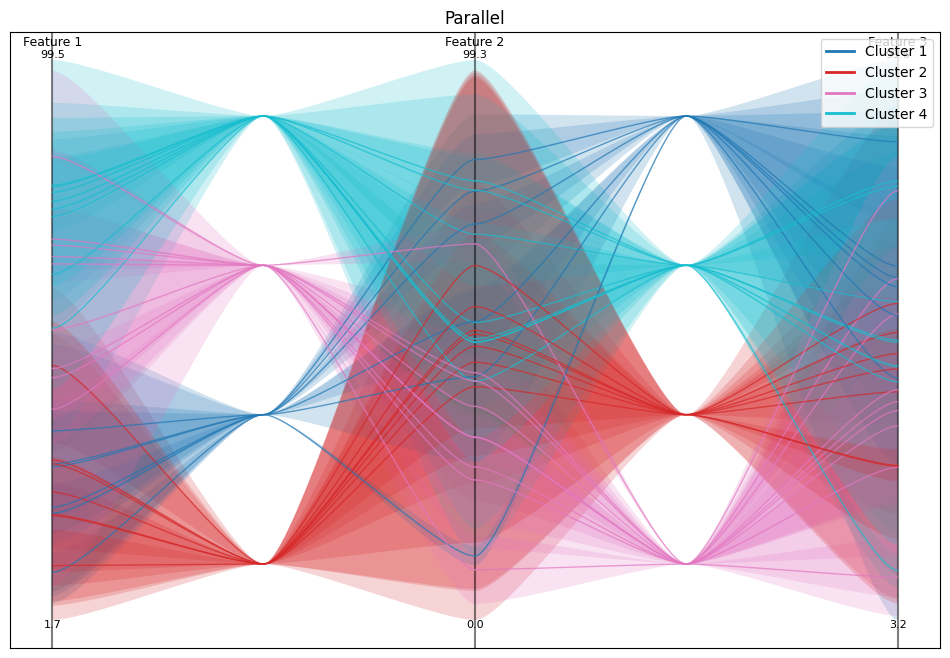

In [5]:
model.get_crisp_assignments()

print(silhouette_score(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))
print(dunn_index(random_data.get_intervals(),model.get_crisp_assignments(),metric='euclidean'))

plt.figure(figsize=(10, 6))
IntervalParallelCoordinates.plot_interval_curves(data = random_data.get_intervals(), feature_names= None, clusters=model.get_crisp_assignments(), beta = 1)
plt.title("Parallel")
plt.show()

In [6]:
n_dims = random_data.get_intervals().shape[1]

som = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som.pca_weights_init(random_data.get_intervals())

In [7]:
som.train_incremental(random_data.get_intervals(), verbose= False)

assignments = som.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som.topographic_error(random_data.get_intervals())


Neuron (0, 1) has these sample indices => [0, 9, 21, 24]
Neuron (1, 1) has these sample indices => [1, 2, 3, 4, 10, 14, 16, 20, 23, 25, 29]
Neuron (0, 0) has these sample indices => [5, 6, 8, 12, 13, 15, 17, 18, 19, 26, 28]
Neuron (1, 0) has these sample indices => [7, 11, 22, 27]


0.0

In [8]:
som_2 = IntervalSOM(x = 2, y = 2, n_dims = n_dims, sigma_init=2, sigma_final=1, learning_rate=0.5, total_iterations=500, )

som_2.pca_weights_init(random_data.get_intervals())

In [9]:
som_2.train_batch(random_data.get_intervals(), verbose= False)

assignments = som_2.get_neuron_assignments(random_data.get_intervals(), return_indices=True)

for neuron_pos, sample_indexes in assignments.items():
    print("Neuron", neuron_pos, "has these sample indices =>", sample_indexes)

som_2.topographic_error(random_data.get_intervals())

Neuron (1, 1) has these sample indices => [0, 11, 24]
Neuron (1, 0) has these sample indices => [1, 2, 3, 4, 9, 10, 14, 16, 20, 23, 25, 29]
Neuron (0, 1) has these sample indices => [5, 6, 8, 12, 13, 15, 17, 18, 19, 26, 27, 28]
Neuron (0, 0) has these sample indices => [7, 21, 22]


0.0